<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

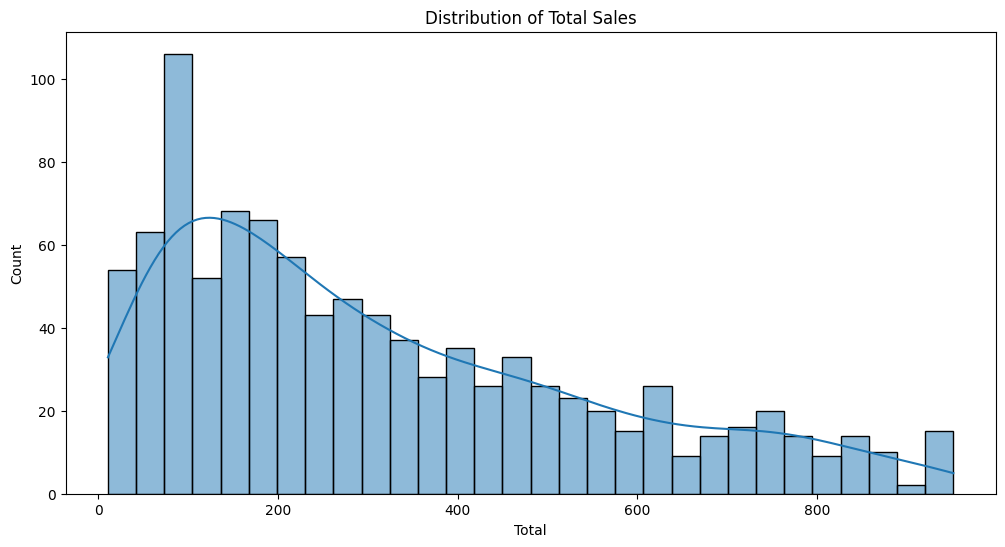

       Unit price    Quantity      Tax 5%       Total        cogs  \
count  991.000000  991.000000  991.000000  991.000000  991.000000   
mean    55.292482    5.469223   15.076417  316.604752  301.528335   
std     26.311619    2.905031   11.319504  237.709589  226.390085   
min     10.080000    1.000000    0.508500   10.678500   10.170000   
25%     32.665000    3.000000    5.817500  122.167500  116.350000   
50%     54.840000    5.000000   12.036000  252.756000  240.720000   
75%     77.485000    8.000000   22.127000  464.667000  442.540000   
max     99.960000   10.000000   45.325000  951.825000  906.500000   

       gross margin percentage  gross income      Rating  
count             9.910000e+02    991.000000  991.000000  
mean              4.761905e+00     15.076417    6.979717  
std               6.131525e-14     11.319504    1.716957  
min               4.761905e+00      0.508500    4.000000  
25%               4.761905e+00      5.817500    5.500000  
50%               4.7619

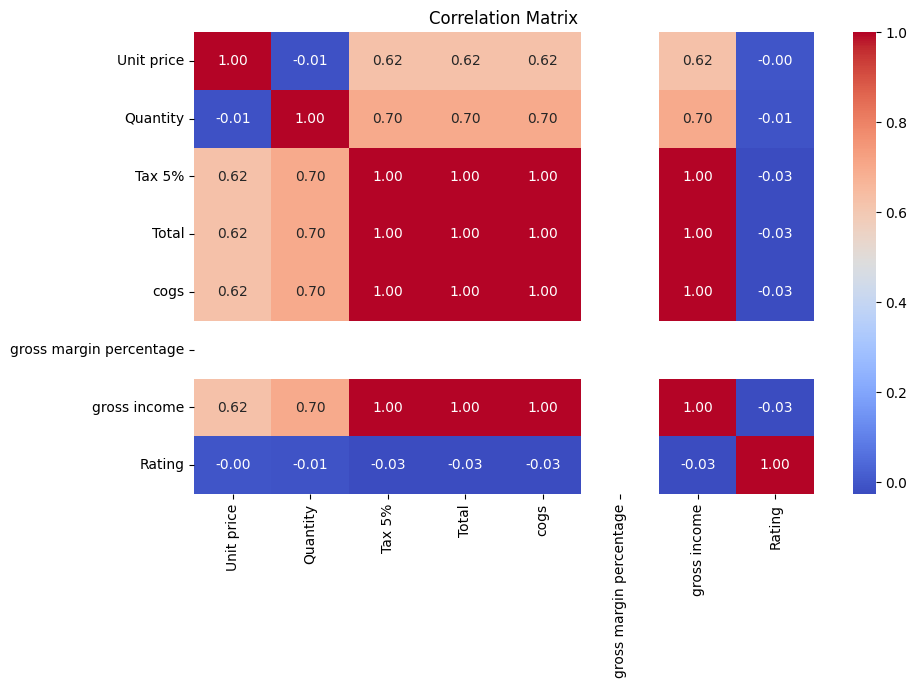

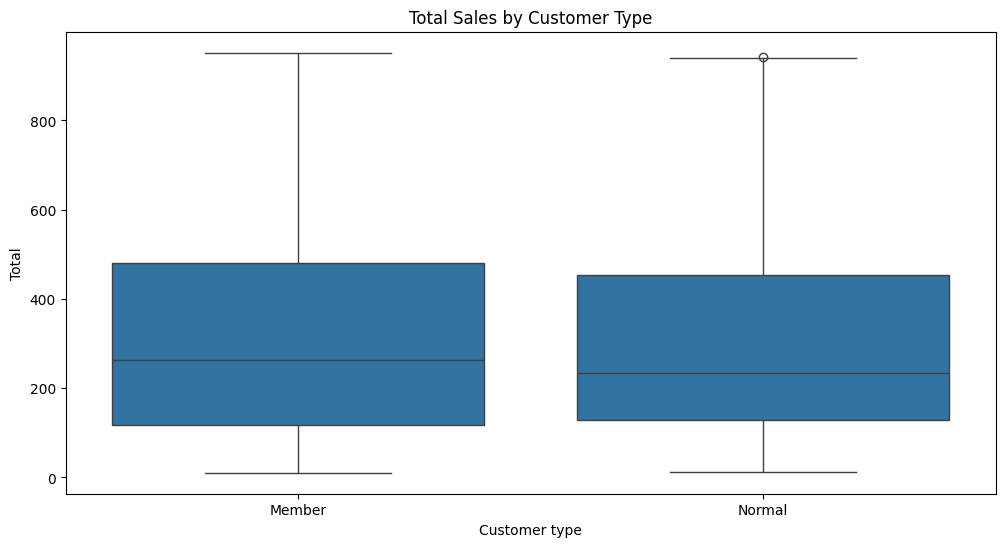

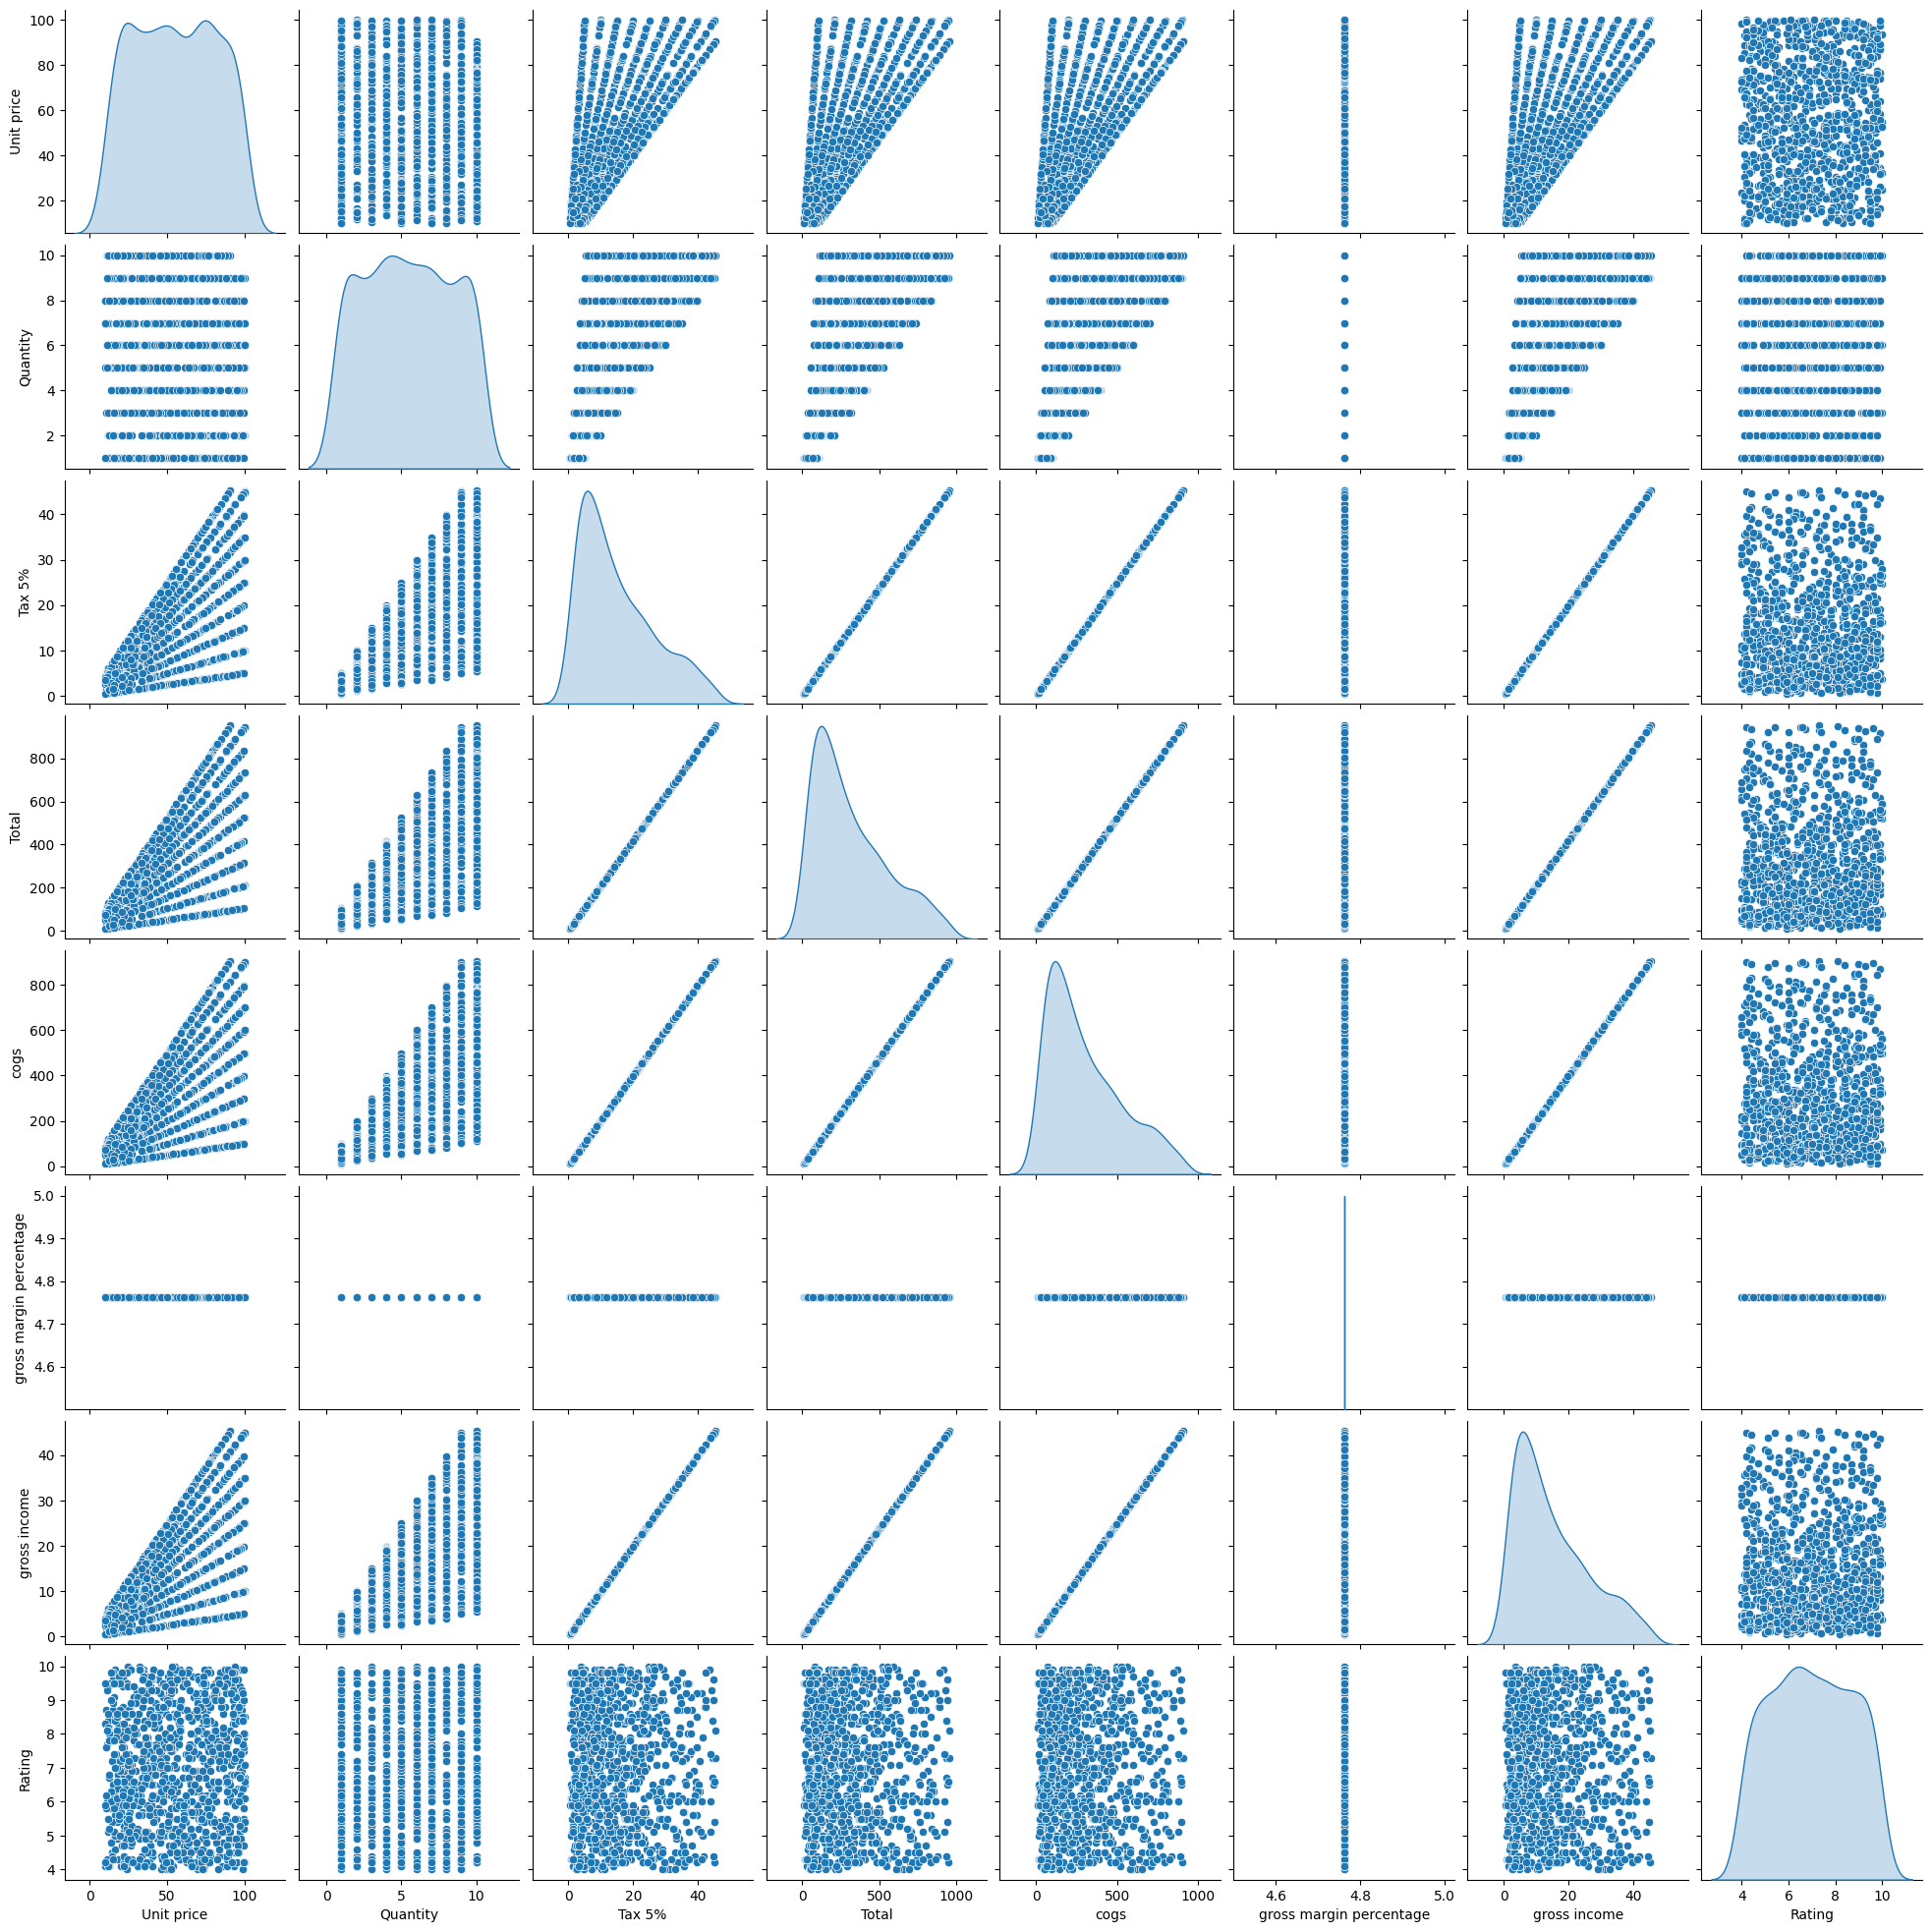

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
url = "/supermarket_sales - Sheet1.csv"
df = pd.read_csv(url)

#Display basic info
df.info()
df.head()

#Data Cleaning

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#Standardizing categorical values (fixing typos and inconsistencies)
df['Customer type'] = df['Customer type'].str.strip().str.title()
df['Payment'] = df['Payment'].str.strip().str.title()

#Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df['Total'], bins=30, kde=True)
plt.title('Distribution of Total Sales')
plt.show()

print(df.describe())

df_numeric = df.select_dtypes(include=['number'])


#heatmap plot for the numeric data
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm',  fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Box plot for categorical vs numerical analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer type', y='Total', data=df)
plt.title('Total Sales by Customer Type')
plt.show()

# Pairplot for multivariate analysis
sns.pairplot(df, diag_kind='kde')
plt.show()

# Save cleaned dataset
df.to_csv("cleaned_supermarket_sales.csv", index=False)
